In [1]:
#Convolutional Neural Networks (CNNs)?
#image preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')
test_no_labels_SCAM = pd.read_csv('test.csv')

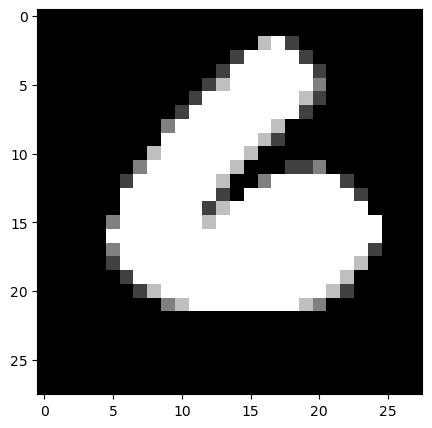

In [3]:
number_index = 500
im1 = Image.new('RGBA', (28,28),'white')
pixels = []
for i in range(784):
        c = train.iat[number_index, i + 1]
        pixels.append((c,c,c))

im1.putdata(pixels)
plt.figure(figsize=(10,5))
imgplot = plt.imshow(im1)

In [4]:
knn100 = KNeighborsClassifier(n_neighbors = 100)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors = 1)

In [5]:
X = train.iloc[:, 1:]  # All pixel columns
y = train.iloc[:, 0]   # Label column

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
knn100.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_100 = knn100.predict(X_test.values)
y_pred_5 = knn5.predict(X_test.values)
y_pred_1 = knn1.predict(X_test.values)

c:\Users\misie\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\misie\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\misie\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [8]:
print("Accuracy with k=100", accuracy_score(y_test, y_pred_100)*100) # tutaj pewnie jest underfit
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)  
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100) # z tak malym k moglo byc overfit ale dziala

Accuracy with k=100 92.85714285714286
Accuracy with k=5 96.48809523809524
Accuracy with k=1 96.86904761904762


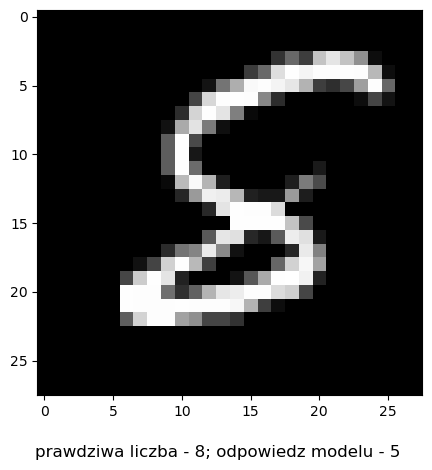

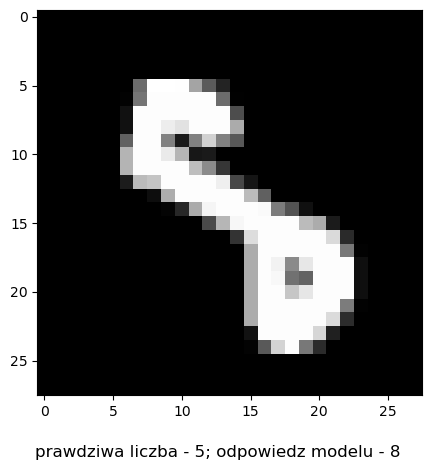

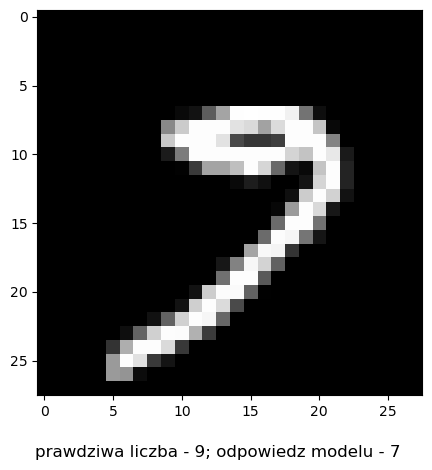

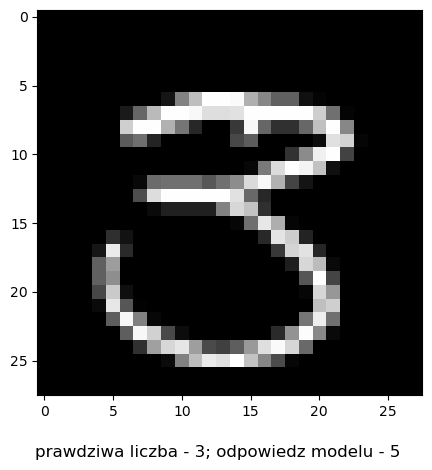

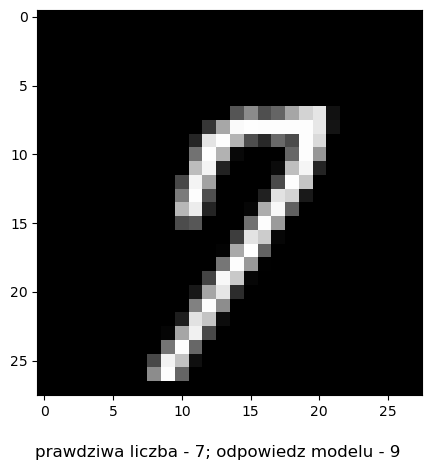

In [10]:
# znajdzmy przykladowe miejce z ktorym mial problem

diff = np.flatnonzero(y_test != y_pred_1)
ile_przykladow = 5

for j in range(ile_przykladow):
        index = diff[j]
        true_number = y_test.iloc[index]
        model_guess = y_pred_1[index]

        im1 = Image.new('RGBA', (28,28),'white')
        pixels = []
        for i in range(784):
                c = X_test.iat[index, i]
                pixels.append((c,c,c))

        im1.putdata(pixels)
        plt.figure(figsize=(10,5))
        imgplot = plt.imshow(im1)
        plt.figtext(0.5, 0.01, f"prawdziwa liczba - {true_number}; odpowiedz modelu - {model_guess}", ha='center', va='top', fontsize=12, color='black')

In [ ]:
# preprocesing 
# co jesli zmienimy intensywnosc pikseli na ekstrema (0 i 255)

In [50]:
param = 50

X = train.iloc[:, 1:]
X = X.applymap(lambda x: 255 if x > param else 0)

#knn3 = KNeighborsClassifier(n_neighbors = 3)
knn1 = KNeighborsClassifier(n_neighbors = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#knn3.fit(X_train, y_train)
knn1.fit(X_train, y_train)

#y_pred_3 = knn3.predict(X_test.values)
y_pred_1 = knn1.predict(X_test.values)

#print("Accuracy after processing with k=3", accuracy_score(y_test, y_pred_3)*100)
print("Accuracy after processing with k=1", accuracy_score(y_test, y_pred_1)*100)

c:\Users\misie\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy after processing with k=1 96.45238095238096


Dokladnosc dla roznych parametrow

240 - 84.6547619047619
200 - 91.77380952380952
100 - 96.10714285714286
50 - 96.45238095238096

In [ ]:
# w tym przypadku ten typ preprocesingu tylko popsul model 